# PCA Demo
by Ahmet Sacan.


In [15]:
#See bmes.ahmet/README.TXT for setting up BMESAHMETDIR environment variable.
import sys,os; sys.path.append(os.environ['BMESAHMETDIR']); import bmes

import pandas as pd
import numpy as np
from pylab import *


from sklearn.decomposition import PCA
import math

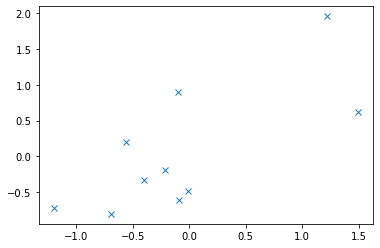

In [54]:
# X is some random 2-dimensional (ie. 2-columns) data created to demonstrate PCA.
X=np.transpose(np.asarray([[1.6346,3.4139,2.1032,1.5016,1.7981,2.0931,3.6921,1.9798,0.9957,2.1809],[2.3989,4.1540,1.5850,1.3911,1.8662,3.0932,2.8182,2.0100,1.4805,1.7162]]))

# mean-shift'ing is not required for transformation
# But we are mean-shifting to improve the visualization and to also allow comparison with reconstructed data.
X=X-X.mean();
plot(X[:,0],X[:,1],'x');

## Apply PCA

In [57]:
p = PCA(n_components=2)
p.fit(X)
PC = p.components_;
Y = p.transform(X);
V = p.explained_variance_ratio_;

In [58]:
print('Percent Variances of Each component:');
print( V*100 )

print('Cumulative Percent Variances:');
print( np.cumsum(V*100 ))

Percent Variances of Each component:
[86.73178451 13.26821549]
Cumulative Percent Variances:
[ 86.73178451 100.        ]


## Plot each PC on the original data

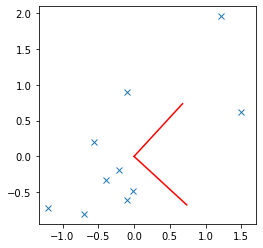

In [60]:
plot(X[:,0],X[:,1],'x');
for i in range(0,2):
    plot([0, PC[0,i]], [0, PC[1,i]], '-r');
axis('square');

## Plot the projected data

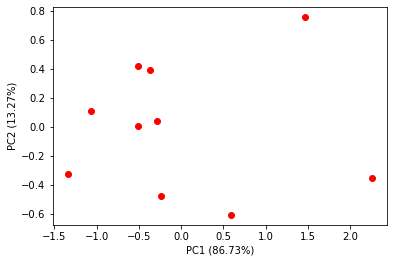

In [63]:
plot(Y[:,0],Y[:,1],'ro');
xlabel( 'PC1 (%.2f%%)' % (V[0]*100) );
ylabel( 'PC2 (%.2f%%)' % (V[1]*100) );

## Reconstruct the data e.g., using only 1 dimension

Reconstruction error using 1 component: 0.542674



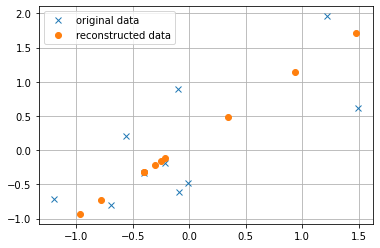

In [73]:
q = PCA( n_components=1 )
q.fit(X)
Y = q.transform(X);
Xrec= q.inverse_transform(Y)
plot(X[:,0],X[:,1],'x');
plot(Xrec[:,0],Xrec[:,1],'o')
legend(['original data','reconstructed data']);
grid('on')

from sklearn.metrics import mean_squared_error
# this comparison will only work if X is mean-shifted.
error = mean_squared_error(X, Xrec, squared=False)
print('Reconstruction error using 1 component: %f\n' % (math.sqrt(error)) );


## 

## 

## 